# Lab | Imbalanced data

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import StandardScaler
password = getpass.getpass()

········


In [52]:
!pip install imblearn

     |████████████████████████████████| 206 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 10.0 MB/s eta 0:00:01    |████▉                           | 1.1 MB 9.0 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [57]:
!pip install delayed

     |████████████████████████████████| 72 kB 1.1 MB/s eta 0:00:01


In [2]:
from imblearn.over_sampling import SMOTE

 ### 1. Load the dataset and explore the variables.

In [33]:
data = pd.read_csv('/Users/ritasilva/lab-imbalanced-data/files_for_lab/customer_churn.csv')

In [34]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

In [35]:
data[['Churn', 'tenure', 'SeniorCitizen', 'MonthlyCharges']]

,Churn,tenure,SeniorCitizen,MonthlyCharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70
...,...,...,...,...
7038,No,24,0,84.80
7039,No,72,0,103.20
7040,No,11,0,29.60
7041,Yes,4,1,74.40


In [36]:
data[['Churn']].value_counts()

Churn
No       5174
Yes      1869
dtype: int64

In [37]:
# I will treat senior citizen as categorical

data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

### 3. Extract the target variable.

In [38]:
y = data['Churn']

### 4. Extract the independent variables and scale them.

In [39]:
x = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [40]:
# using standard scaler
transformer = StandardScaler()
# so make sure you do the train-test split first
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(x)

x_standardized = transformer.transform(x)
x_standardized

array([[-1.27744458, -0.43991649, -1.16032292],
       [ 0.06632742, -0.43991649, -0.25962894],
       [-1.23672422, -0.43991649, -0.36266036],
       ...,
       [-0.87024095, -0.43991649, -1.1686319 ],
       [-1.15528349,  2.27315869,  0.32033821],
       [ 1.36937906, -0.43991649,  1.35896134]])

### 5. Build the logistic regression model.

In [41]:
#Get dummies

x = pd.get_dummies(x)
x

,tenure,MonthlyCharges,SeniorCitizen_0,SeniorCitizen_1
0,1,29.85,1,0
1,34,56.95,1,0
2,2,53.85,1,0
3,45,42.30,1,0
4,2,70.70,1,0
...,...,...,...,...
7038,24,84.80,1,0
7039,72,103.20,1,0
7040,11,29.60,1,0
7041,4,74.40,0,1


In [42]:
#train test slipt

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

### 6. Evaluate the model.

In [44]:
classification.score(x_test, y_test)

0.8062455642299503

In [45]:
predictions = classification.predict(x_test)
confusion_matrix(y_test, predictions)

array([[956,  80],
       [193, 180]])

<AxesSubplot:>

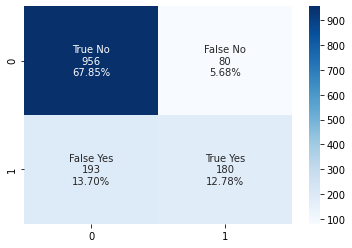

In [46]:

cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 7. Even a simple model will give us more than 70% accuracy. Why?

Due to data imbalance. No is overrepresented, therefore the model will predict No more often than Yes.
Churn
No       5174
Yes      1869

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_sm, y_sm = smote.fit_resample(x, y)
y_sm.value_counts()

#I get the following error :( 

No     5174
Yes    5174
Name: Churn, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

In [49]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [50]:
classification.score(x_test, y_test)

0.7681159420289855

In [51]:
predictions = classification.predict(x_test)
confusion_matrix(y_test, predictions)


array([[786, 235],
       [245, 804]])

<AxesSubplot:>

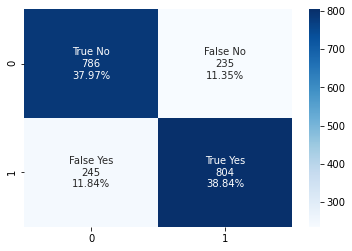

In [52]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

The score dropped but It has improved in the minority class (Yes).

### 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [53]:

from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
x_tl, y_tl = tomek.fit_resample(x, y)
y_tl.value_counts()


No     4704
Yes    1869
Name: Churn, dtype: int64

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_tl, y_tl, test_size=0.2, random_state=42)

In [55]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [56]:
classification.score(x_test, y_test)

0.7809885931558935

In [57]:
predictions = classification.predict(x_test)
confusion_matrix(y_test, predictions)

array([[819,  97],
       [191, 208]])

<AxesSubplot:>

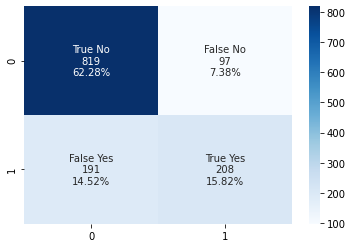

In [58]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

It did not improve the minority class, the SMOTE tecnhique was better.